In [ ]:
!mamba install obspy
!mamba install numpy
!mamba install matplotlib

In [2]:
import obspy
import matplotlib.pyplot as plt
import numpy as np

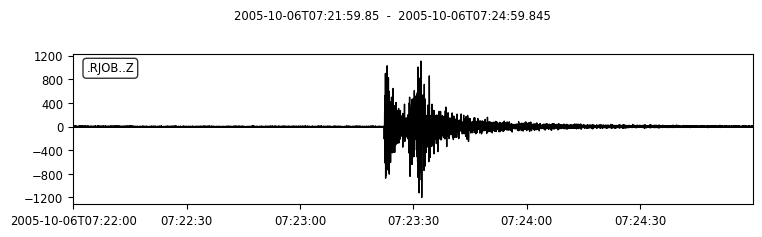

/Users/adis/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  fig.canvas.print_figure(bytes_io, **kw)


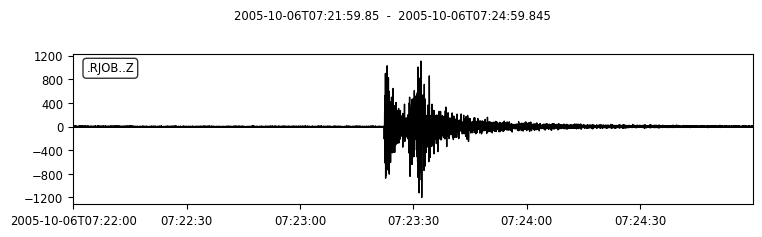

In [7]:
# Read the seismogram
stream = obspy.read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")
tr = stream[0]
tr.plot()

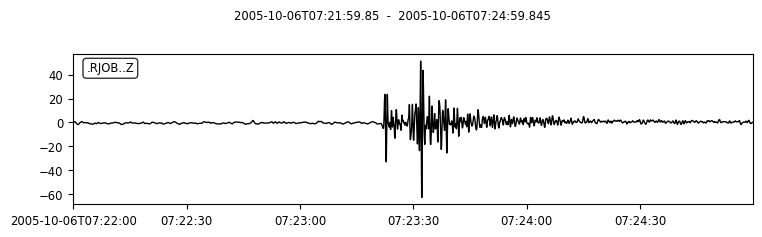

/Users/adis/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  fig.canvas.print_figure(bytes_io, **kw)


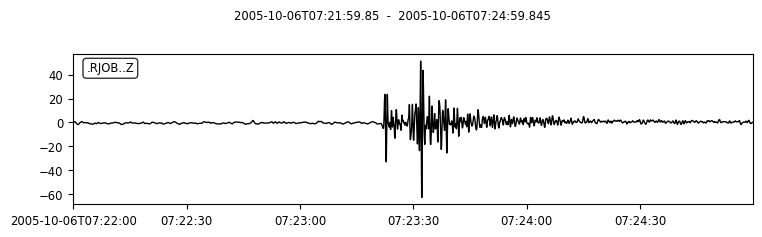

In [10]:
# Filtering with a lowpass on a copy of the original Trace
tr_filter = tr.copy()
tr_filter.filter('lowpass', freq=1.0, corners=2, zerophase=True)
tr_filter.plot()

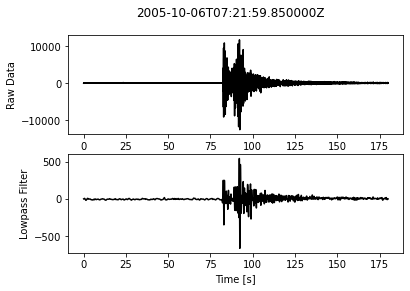

In [13]:
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
plt.subplot(211)
plt.plot(t, tr.data, 'k')
plt.ylabel('Raw Data')
plt.subplot(212)
plt.plot(t, tr_filter.data, 'k')
plt.ylabel('Lowpass Filter')
plt.xlabel('Time [s]')
plt.suptitle(tr.stats.starttime)
plt.show()